In [79]:
%matplotlib inline
import random
import numpy as np
import torch
import matplotlib.pyplot as plt

In [92]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [93]:
# seeing first feature and label
print("features:", features[0], '\nlabel:', labels[0])

features: tensor([0.3666, 0.9781]) 
label: tensor([1.6189])


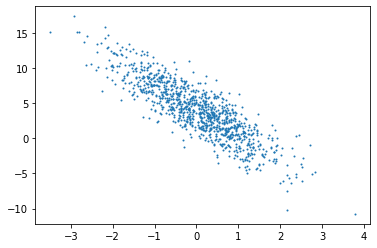

In [94]:
# Generate scatter plot using second feature and labels
plt.scatter(features[:, 1], labels, 1)

In [95]:
# creating the data_iter function as our utility function
# function takes batch size, matrix of features, vector of labels, yielding minibatches of size batch_size
# minibatches constis of tuple of features and labels

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # read examples in random order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [96]:
# printing batch of data examples to read data
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.5129, -0.0218],
        [-0.6501,  0.9014],
        [ 1.3887,  0.2934],
        [-1.4640,  0.4458],
        [-1.5134, -1.5082],
        [-0.2716, -0.4346],
        [-1.1983,  0.1718],
        [-0.8454, -1.6080],
        [-0.7165, -1.5584],
        [ 0.0270,  1.1838]]) 
 tensor([[ 1.2396],
        [-0.1527],
        [ 5.9647],
        [-0.2471],
        [ 6.3174],
        [ 5.1242],
        [ 1.2124],
        [ 7.9795],
        [ 8.0652],
        [ 0.2248]])


In [97]:
'''Initialize Parameters'''
# weights and bias are sampled at random numbers from a normal distrubtion, with a mean 0 and standard deviation of 0.01
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [98]:
'''
Building the Model....
a linear model works by taking the matrix-vector product of the features and weights and add the offset to the result
X = features, w = weights, b = offset
'''
def linear_regression(X, w, b):  #@save
    return torch.matmul(X, w) + b

In [99]:
'''Creating loss function'''
# squared loss ufnction requires transforming true y value to predicted value's shape (y_hat)
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [100]:
'''Creating the Optimization Alg'''
# applying minibatch SGD (stochastic gradient descent) cause why not :)
# function will take a minibatch drawn from dataset and estiamte gradient of loss with parameters respectfully
# updates params to reduce loss
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [102]:
'''Training the model
Creates a loop that does the following:
    1. Initlializes parameters (weights and bias)
    2. Reepats until finsihed computing gradient + udpating parameters
'''
# In each iteration, we will grab a minibatch of training examples, and pass them through our model to obtain a set of predictions. After calculating the loss, we initiate the backwards pass through the network, storing the gradients with respect to each parameter. Finally, we will call the optimization algorithm sgd to update the model parameters
# function takes a minibatch of features and labels, and returns the loss and the gradients
lr = 0.04
num_epochs = 10
net = linear_regression
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters with gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000053
epoch 2, loss 0.000053
epoch 3, loss 0.000053
epoch 4, loss 0.000053
epoch 5, loss 0.000053
epoch 6, loss 0.000053
epoch 7, loss 0.000053
epoch 8, loss 0.000053
epoch 9, loss 0.000053
epoch 10, loss 0.000053


In [103]:
# Evluate the model
print(f'Error with estimating weight: {true_w - w.reshape(true_w.shape)}')
print(f'Error with estimating bias: {true_b - b.resshape(true_b.shape)}')

tensor([[1.7427e-05],
        [8.1907e-06],
        [3.6639e-06],
        [4.8700e-04],
        [9.3731e-08],
        [4.4345e-05],
        [4.6905e-05],
        [2.0901e-05],
        [1.0028e-04],
        [5.0890e-05]], grad_fn=<DivBackward0>)